In [ ]:
# 환경설정

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (29.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

In [ ]:
#1. 정규분포

# 세 지역의 성인 남성 키 분포 (정규분포)
np.random.seed(42)

# A지역: 평균 175cm, 표준편차 5cm
region_a_heights = np.random.normal(175, 5, 1000)

# B지역: 평균 170cm, 표준편차 5cm (평균만 다름)
region_b_heights = np.random.normal(170, 5, 1000)

# C지역: 평균 175cm, 표준편차 8cm (표준편차만 다름)
region_c_heights = np.random.normal(175, 8, 1000)

height_data = pd.DataFrame({
    'region': ['A']*1000 + ['B']*1000 + ['C']*1000,
    'height': np.concatenate([region_a_heights, region_b_heights, region_c_heights])
})

print("📏 세 지역 성인 남성 키 데이터")
print(height_data.groupby('region')['height'].describe())


📏 세 지역 성인 남성 키 데이터
         count        mean       std         min         25%         50%  \
region                                                                     
A       1000.0  175.096660  4.896080  158.793663  171.762048  175.126503   
B       1000.0  170.354181  4.987272  155.298057  166.968792  170.315386   
C       1000.0  175.046674  7.867634  150.843903  169.816003  174.997994   

               75%         max  
region                          
A       178.239719  194.263657  
B       173.644411  185.965538  
C       180.287323  206.409902  


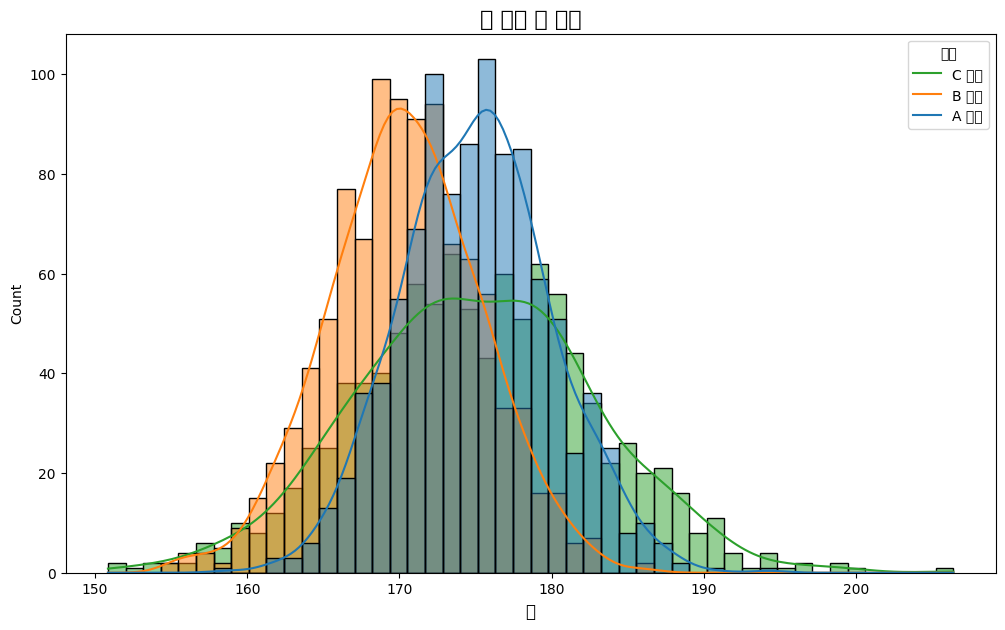

In [ ]:
#1.1. 세 지역의 키 분포를 하나의 그래프에 히스토그램으로 그리기 (투먕도 조정)

plt.figure(figsize=(12, 7)) # 그래프 크기 설정
sns.histplot(data=height_data, x='height', hue='region', kde=True, alpha=0.5)

plt.title('세 지역 키 분포', fontsize=16)
plt.xlabel('키', fontsize=12)
plt.legend(title='지역', labels=['C 지역', 'B 지역', 'A 지역'])
plt.show()

175.0966602791116 170.3541811862458 175.0466737164482
4.896079690898376 4.987271886137106 7.867634248816586


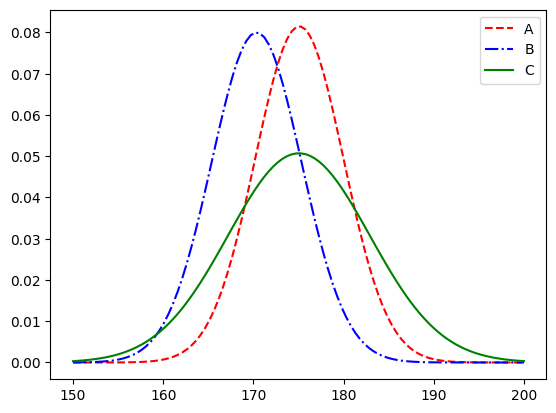

In [ ]:
#1.2. 각 지역의 이론적 정규분포 곡선을 함께 표시

mean_a, mean_b, mean_c = height_data.groupby('region')['height'].mean()

std_a, std_b, std_c = height_data.groupby('region')['height'].std()

print(mean_a, mean_b, mean_c)
print(std_a, std_b, std_c)

sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_a, std_a), color='red', label='A', linestyle='--')
sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_b, std_b), color='blue', label='B', linestyle='-.')
sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_c, std_c), color='green', label='C', linestyle='-')
plt.show()

In [ ]:
#1.3. 68-95-99.7 규칙을 A지역 데이터로 검증

temp_a = height_data[height_data['region'] == 'A']

mean_a = temp_a['height'].mean()
std_a = temp_a['height'].std()

print(mean_a, std_a)

ratio_1sigma = len(temp_a[(temp_a['height'] >= (mean_a - std_a)) & (temp_a['height'] <= (mean_a + std_a))]) / len(temp_a)*100 # 68%
ratio_2sigma = len(temp_a[(temp_a['height'] >= (mean_a - 2*std_a)) & (temp_a['height'] <= (mean_a + 2*std_a))]) / len(temp_a)*100 # 95%
ratio_3sigma = len(temp_a[(temp_a['height'] >= (mean_a - 3*std_a)) & (temp_a['height'] <= (mean_a + 3*std_a))]) / len(temp_a)*100 # 99.7%

print(f'{ratio_1sigma:.2f}%')
print(f'{ratio_2sigma:.2f}%')
print(f'{ratio_3sigma:.2f}%')

175.0966602791116 4.89607969089838
68.60%
95.60%
99.70%


In [ ]:
#1.4. A, C 지역은 평균은 같지만 분포 모양이 다른 이유

#표준 편차는 달라 데이터가 떨어져 있는 정도가 다르기 때문에
#C가 더 퍼져 있는 모양이다

In [ ]:
#2. 표준화

# 시험 점수 데이터 생성
np.random.seed(123)

# 수학: 평균 75점, 표준편차 12점
math_scores = np.random.normal(75, 12, 1000)

# 영어: 평균 82점, 표준편차 8점
english_scores = np.random.normal(82, 8, 1000)

# 철수 학생의 점수
student_math = 87
student_english = 88

scores_data = pd.DataFrame({
    'subject': ['Math']*1000 + ['English']*1000,
    'score': np.concatenate([math_scores, english_scores])
})

print("📚 수학/영어 시험 점수 분포")
print(f"수학 - 평균: {math_scores.mean():.1f}, 표준편차: {math_scores.std():.1f}")
print(f"영어 - 평균: {english_scores.mean():.1f}, 표준편차: {english_scores.std():.1f}")
print(f"\n철수 학생 점수: 수학 {student_math}점, 영어 {student_english}점")


📚 수학/영어 시험 점수 분포
수학 - 평균: 74.5, 표준편차: 12.0
영어 - 평균: 82.1, 표준편차: 7.7

철수 학생 점수: 수학 87점, 영어 88점


<Axes: xlabel='score', ylabel='Count'>

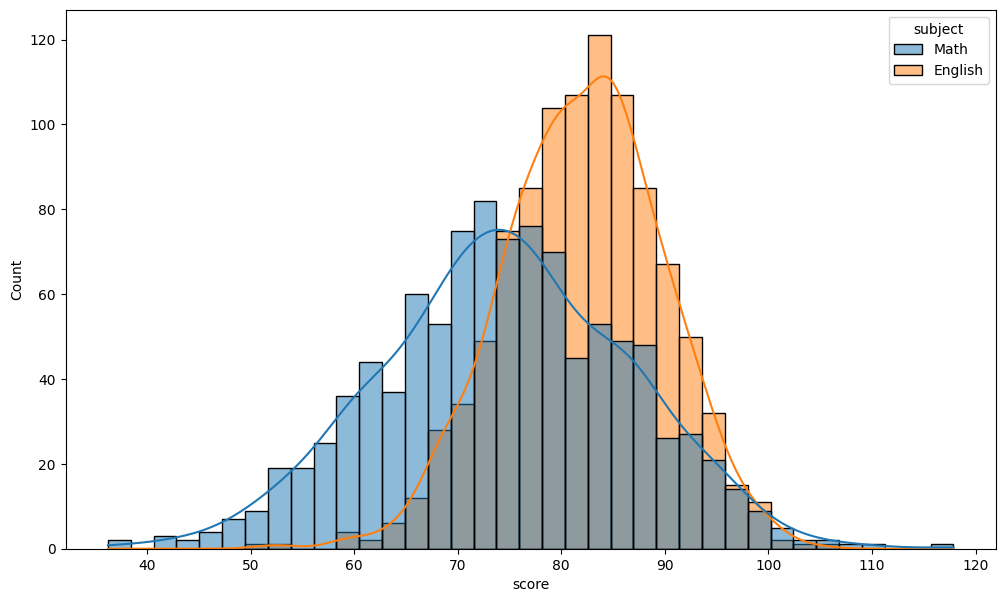

In [ ]:
#2.1. 수학, 영어점수 분포를 나란히 비교하는 히스토그램 출력

plt.figure(figsize=(12, 7))
sns.histplot(data=scores_data, x='score', hue='subject', kde=True, alpha=0.5)

In [ ]:
#2.2. 철수 학생의 수학/영어 점수를 각각 z값으로 표준화하기

student_math_z = (student_math - math_scores.mean()) / math_scores.std()
student_english_z = (student_english - english_scores.mean()) / english_scores.std()

print(f"철수 학생의 수학 점수 z값: {student_math_z:.2f}")
print(f"철수 학생의 영어 점수 z값: {student_english_z:.2f}")

철수 학생의 수학 점수 z값: 1.04
철수 학생의 영어 점수 z값: 0.77


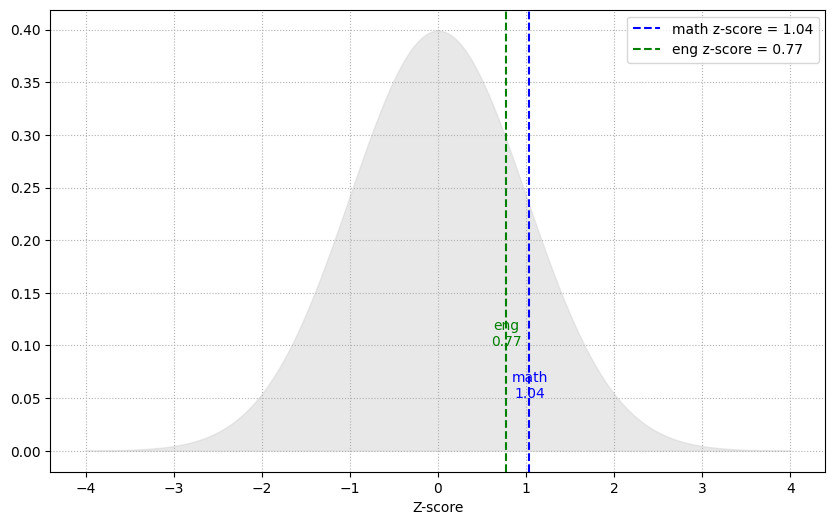

In [ ]:
# 2.3. 표준정규분포 N(0, 1)에서 해당 z값들이 어느 위치에 있는지 시각화하기

plt.figure(figsize=(10, 6))

#표준정규분포
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, 0, 1)
plt.fill_between(x, pdf, color='lightgray', alpha=0.5)

# 철수 학생의 z값 위치를 수직선으로 표시
plt.axvline(student_math_z, color='blue', linestyle='--', label=f'math z-score = {student_math_z:.2f}')
plt.axvline(student_english_z, color='green', linestyle='--', label=f'eng z-score = {student_english_z:.2f}')

# 각 z값에 텍스트 추가
plt.text(student_math_z, 0.05, f'math\n{student_math_z:.2f}', ha='center', color='blue')
plt.text(student_english_z, 0.1, f'eng\n{student_english_z:.2f}', ha='center', color='green')

plt.xlabel('Z-score')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

In [ ]:
#2.4. 이 학생이 수학과 영어 중 상대적으로 어느 과목을 더 잘했는지

#수학을 더 잘함

In [ ]:
#2.5. 표준화가 왜 필요한가

#표준화를 통해 같은 시작점에서의 비교가 가능

In [ ]:
#3. 중심극한정리

# 모집단: 지수분포 (매우 치우친 분포)
np.random.seed(456)

# 모집단 파라미터
population_lambda = 0.1  # 지수분포의 모수
population_mean = 1/population_lambda  # 이론적 평균 = 10
population_std = 1/population_lambda   # 이론적 표준편차 = 10

print("📊 모집단 정보 (지수분포)")
print(f"이론적 평균: {population_mean}")
print(f"이론적 표준편차: {population_std}")

# 모집단에서 표본 하나 생성 (분포 확인용)
population_sample = np.random.exponential(1/population_lambda, 10000)

print(f"실제 모집단 표본 평균: {population_sample.mean():.2f}")
print(f"실제 모집단 표본 표준편차: {population_sample.std():.2f}")


📊 모집단 정보 (지수분포)
이론적 평균: 10.0
이론적 표준편차: 10.0
실제 모집단 표본 평균: 9.91
실제 모집단 표본 표준편차: 9.89


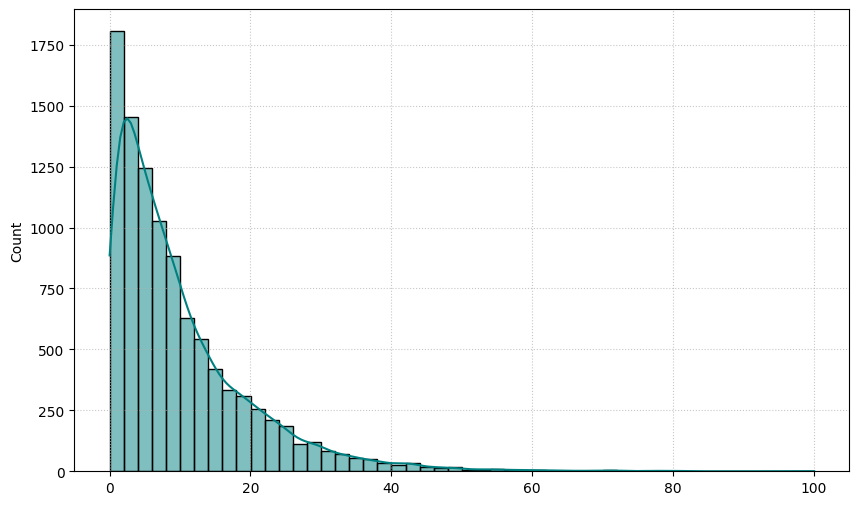

In [ ]:
#3.1. 모집단(지수분포)의 히스트그램 그리기


plt.figure(figsize=(10, 6))
sns.histplot(population_sample, bins=50, kde=True, color='teal')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

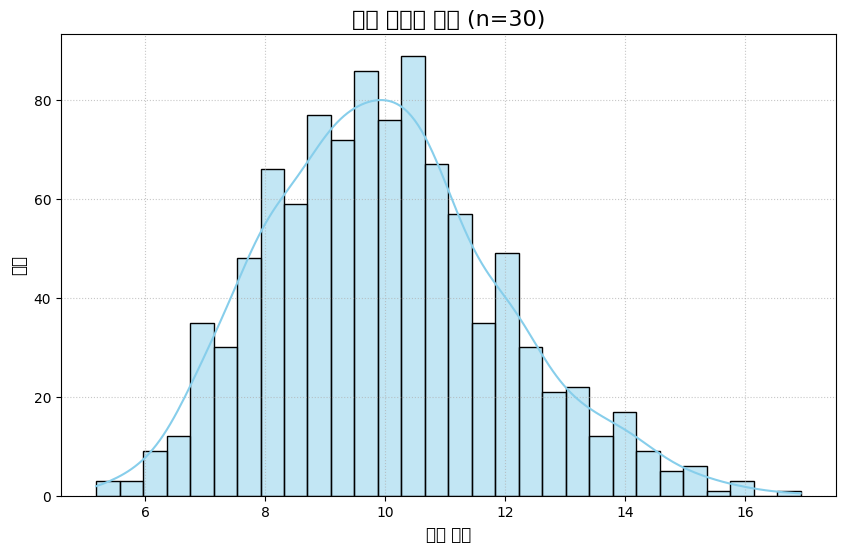

In [ ]:
#3.2. 표본 크기 n= 30으로 1000번, 각 표본의 평균 계산해서 저장, 1000개 표본 평균들의 히스토그램

#표본 크기와 추출 횟수 설정
sample_size = 30
num_samples = 1000

#표본 평균들을 저장할 리스트
sample_means = []

#1000번 표본 추출 및 평균 계산
for _ in range(num_samples):
    #크기 n=30인 표본을 지수분포 모집단에서 추출
    sample = np.random.exponential(1 / population_lambda, size=sample_size)

    #표본의 평균을 계산하여 리스트에 추가
    sample_means.append(sample.mean())

#표본 평균들의 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='skyblue')

# 그래프 제목 및 라벨 설정
plt.title(f'표본 평균의 분포 (n={sample_size})', fontsize=16)
plt.xlabel('표본 평균', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

plt.show()

In [ ]:
#3.3. 표본평균들의 분포가 정규분포와 가까운가


# 1. 표본 평균들의 실제 평균과 표준편차 계산
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

# 2. 중심극한정리에 따른 이론적 표준편차(표준오차) 계산
# 이론값 = 모집단 표준편차 / sqrt(표본크기)
theoretical_std_error = population_std / np.sqrt(sample_size)

# 3. 결과 비교 출력
print("🔬 표본 평균 분포와 중심극한정리 이론값 비교\n")
print(f"모집단의 이론적 평균: {population_mean:.4f}")
print(f"표본 평균들의 실제 평균: {mean_of_sample_means:.4f}\n")

print(f"중심극한정리에 따른 이론적 표준오차 (σ/√n): {theoretical_std_error:.4f}")
print(f"표본 평균들의 실제 표준편차 (표준오차): {std_of_sample_means:.4f}")

# 결과 요약
print("\n[결론]")
print(f"-> 표본 평균들의 평균({mean_of_sample_means:.2f})은 모집단의 평균({population_mean:.2f})에 매우 가깝습니다.")
print(f"-> 표본 평균들의 표준편차({std_of_sample_means:.2f})는 이론적 표준오차({theoretical_std_error:.2f})에 매우 가깝습니다.")
print("따라서, 표본 평균의 분포는 중심극한정리에 따라 정규분포에 근사한다고 볼 수 있습니다.")

🔬 표본 평균 분포와 중심극한정리 이론값 비교

모집단의 이론적 평균: 10.0000
표본 평균들의 실제 평균: 9.9974

중심극한정리에 따른 이론적 표준오차 (σ/√n): 1.8257
표본 평균들의 실제 표준편차 (표준오차): 1.9413

[결론]
-> 표본 평균들의 평균(10.00)은 모집단의 평균(10.00)에 매우 가깝습니다.
-> 표본 평균들의 표준편차(1.94)는 이론적 표준오차(1.83)에 매우 가깝습니다.
따라서, 표본 평균의 분포는 중심극한정리에 따라 정규분포에 근사한다고 볼 수 있습니다.


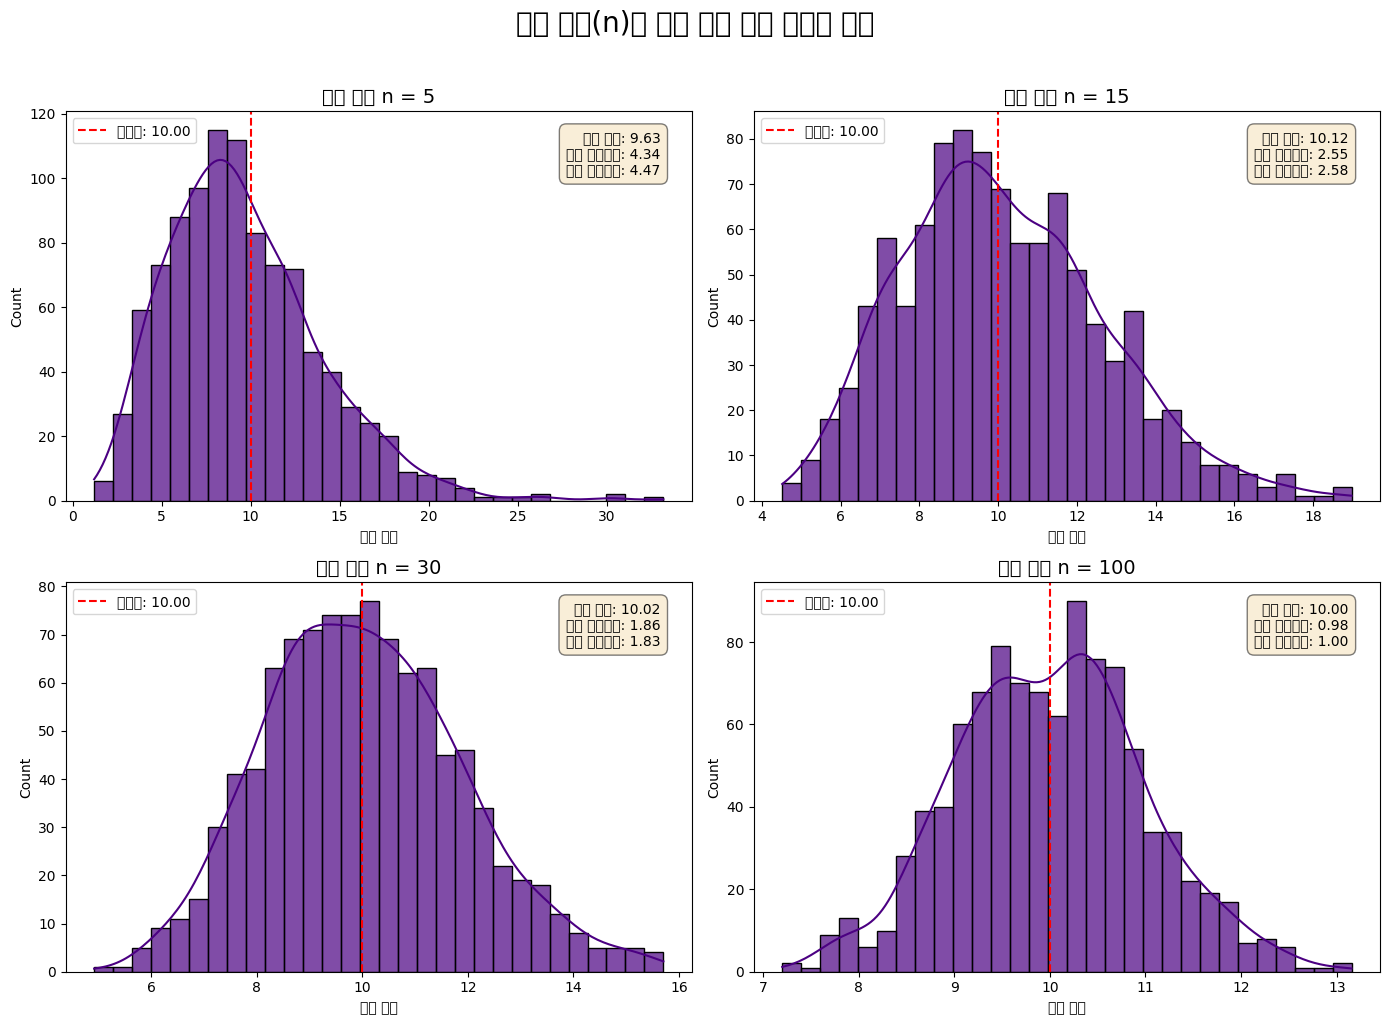

In [ ]:
#3.4. 표본 크기 변화

#n이 커짐에 따라 표본 평균의 분포 모양이 정규분포에 가까워진다

# 관찰할 표본 크기 리스트
sample_sizes = [5, 15, 30, 100]

# 2x2 그리드 형태의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # 2x2 배열을 1차원으로 만듦

# 각 표본 크기별로 반복
for i, n in enumerate(sample_sizes):
    ax = axes[i]
    sample_means = []

    # 1000번 표본 추출
    for _ in range(1000):
        sample = np.random.exponential(1 / population_lambda, size=n)
        sample_means.append(sample.mean())

    # 해당 서브플롯에 히스토그램 그리기
    sns.histplot(sample_means, bins=30, kde=True, ax=ax, color='indigo', alpha=0.7)

    # 이론적 평균과 표준오차 계산
    theoretical_std_error = population_std / np.sqrt(n)

    # 그래프 제목 및 수직선 추가
    ax.set_title(f'표본 크기 n = {n}', fontsize=14)
    ax.axvline(population_mean, color='red', linestyle='--', label=f'모평균: {population_mean:.2f}')
    ax.set_xlabel('표본 평균')
    ax.legend()

    # 텍스트로 이론값과 실제값 표시
    actual_mean = np.mean(sample_means)
    actual_std = np.std(sample_means)
    text_str = (f'실제 평균: {actual_mean:.2f}\n'
                f'실제 표준편차: {actual_std:.2f}\n'
                f'이론 표준오차: {theoretical_std_error:.2f}')
    ax.text(0.95, 0.95, text_str, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# 전체 레이아웃 조정 및 제목 추가
plt.suptitle('표본 크기(n)에 따른 표본 평균 분포의 변화', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
#4. 신뢰구간 구축

# 다이어트 프로그램 참가자들의 체중 감량량 (kg)
np.random.seed(101)

# 실제로는 평균 3.5kg 감량 효과가 있다고 가정
n_participants = 25
true_effect = 3.5
weight_loss = np.random.normal(true_effect, 2.1, n_participants)

diet_data = pd.DataFrame({
    'participant_id': range(1, n_participants+1),
    'weight_loss_kg': weight_loss
})

print("🏃‍♀️ 다이어트 프로그램 체중 감량 데이터")
print(f"참가자 수: {n_participants}명")
print(diet_data.describe())

# 기본 통계량 계산
sample_mean = weight_loss.mean()
sample_std = weight_loss.std(ddof=1)  # 표본 표준편차 (n-1로 나눔)
standard_error = sample_std / np.sqrt(n_participants)

print(f"\n표본 평균: {sample_mean:.2f}kg")
print(f"표본 표준편차: {sample_std:.2f}kg")
print(f"표준오차: {standard_error:.2f}kg")


🏃‍♀️ 다이어트 프로그램 체중 감량 데이터
참가자 수: 25명
       participant_id  weight_loss_kg
count       25.000000       25.000000
mean        13.000000        4.122041
std          7.359801        2.510631
min          1.000000       -0.738153
25%          7.000000        2.263099
50%         13.000000        4.558034
75%         19.000000        5.054256
max         25.000000        9.184385

표본 평균: 4.12kg
표본 표준편차: 2.51kg
표준오차: 0.50kg


<Axes: ylabel='Count'>

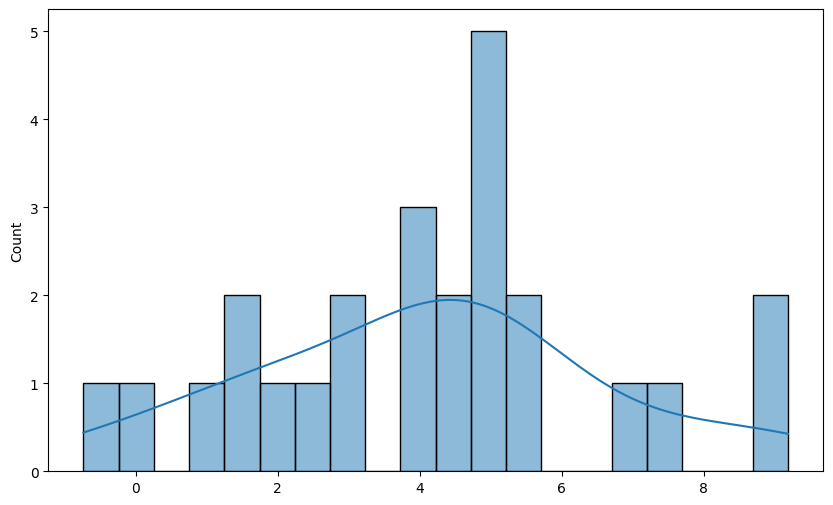

In [ ]:
#4.1. 체중감량량의 히스토그램 그리기

plt.figure(figsize=(10, 6))
sns.histplot(weight_loss, bins=20, kde=True)

In [ ]:
#4.2. 95% 신뢰구간 계산

#자유도 계산
dof = n_participants - 1
print(dof)

24


In [ ]:
#95% 신뢰수준에 해당하는 t-값 찾기
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, dof)
print(t_value)

2.0638985616280205


In [ ]:
#오차범위 계산
margin_of_error = t_value * standard_error
print(margin_of_error)

1.0363373766826327


In [ ]:
#신뢰구간 계산
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(confidence_interval)

(np.float64(3.0857032416770065), np.float64(5.158377995042272))


In [ ]:
#4.3. 90%, 95%, 99% 신뢰구간을 계산 및 비교

t_value_90 = stats.t.ppf(0.95, df)
t_value_95 = stats.t.ppf(0.975, df)
t_value_99 = stats.t.ppf(0.995, df)

print(f"90% 신뢰구간: {sample_mean - t_value_90 * standard_error} ~ {sample_mean + t_value_90 * standard_error}")
print(f"95% 신뢰구간: {sample_mean - t_value_95 * standard_error} ~ {sample_mean + t_value_95 * standard_error}")
print(f"99% 신뢰구간: {sample_mean - t_value_99 * standard_error} ~ {sample_mean + t_value_99 * standard_error}")

NameError: name 'df' is not defined

In [ ]:
#5. 신뢰구간 정밀도 개선

# 배터리 수명 모집단 (실제 평균 500시간, 표준편차 80시간)
np.random.seed(202)

true_battery_life = 500  # 실제 평균 수명
true_battery_std = 80    # 실제 표준편차

print("🔋 배터리 수명 연구")
print(f"실제 평균 수명: {true_battery_life}시간")
print(f"실제 표준편차: {true_battery_std}시간")

# 다양한 표본크기로 실험
sample_sizes = [5, 10, 20, 50, 100, 200]

def calculate_confidence_interval(data, confidence_level=0.95):
    """신뢰구간 계산 함수"""
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(n)

    # t분포의 임계값
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

    # 신뢰구간
    margin_error = t_critical * se
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error

    return mean, ci_lower, ci_upper, margin_error


🔋 배터리 수명 연구
실제 평균 수명: 500시간
실제 표준편차: 80시간


In [ ]:
#5.1. 각 표본크기별로 배터리 표본을 생성하고 95% 신뢰구간 계산

results = []
for size in sample_sizes:
    sample_data = np.random.normal(loc=true_battery_life, scale=true_battery_std, size=size)
    mean, lower, upper, margin = calculate_confidence_interval(sample_data)
    results.append({
        'size': size,
        'mean': mean,
        'margin_error': margin,
        'width': upper - lower
    })

results_df = pd.DataFrame(results)
print(results_df)


   size        mean  margin_error       width
0     5  527.164857     44.892453   89.784907
1    10  467.774987     65.684442  131.368884
2    20  480.091196     43.740330   87.480659
3    50  481.671293     20.736934   41.473869
4   100  508.420171     14.995173   29.990346
5   200  495.040401     11.745254   23.490508


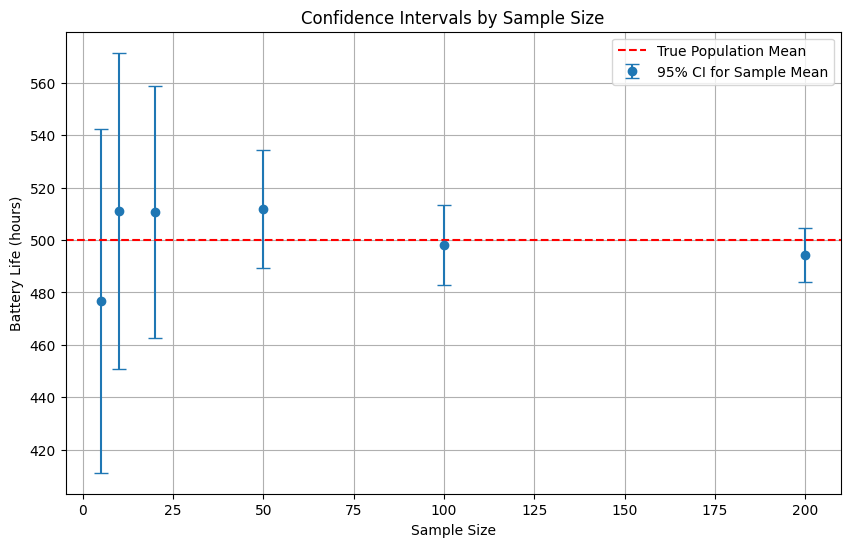

In [ ]:
#5.2. 표본크기별 신뢰구간 시각화

#빨간 선: 실제 모집단 평균= 500시간
#x축: 표본 크기, y축: 배터리 수명
  #표본 크기가 커질수록 신뢰구간의 폭(막대의 길이)이 좁아진다
  # > 좁아질수록 표본 평균이 실제 평균에 더 가깝에 추정된다

means = [r['mean'] for r in results]
margins = [r['margin_error'] for r in results]

plt.figure(figsize=(10, 6))
plt.errorbar(x=sample_sizes, y=means, yerr=margins, fmt='o', capsize=5, label='95% CI for Sample Mean')
plt.axhline(y=true_battery_life, color='r', linestyle='--', label='True Population Mean')
plt.title('Confidence Intervals by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Battery Life (hours)')
plt.legend()
plt.grid(True)
plt.show()

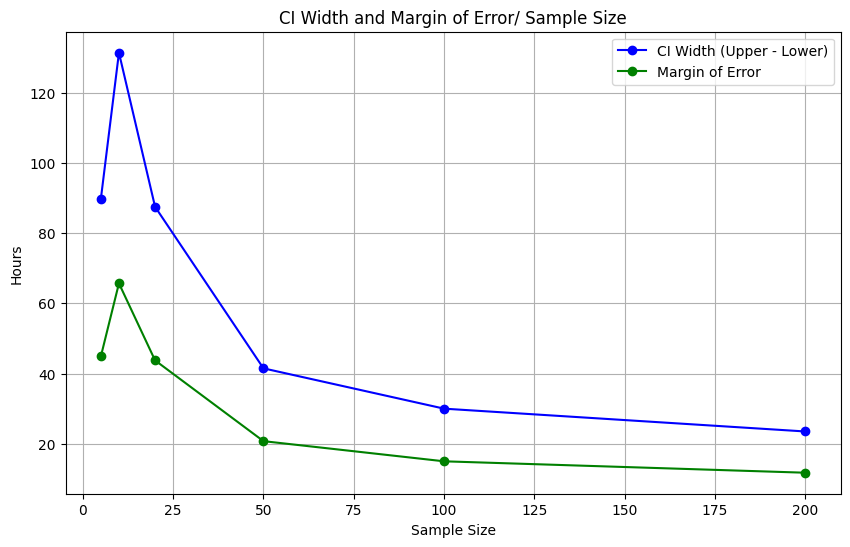

In [ ]:
#5.3. 신뢰구각 폭 및 오차한계 시각화

#표본 크기가 증가하면 신뢰구간의 폭과 오차한계가 어떻게 변하는가
  #표본 크기가 커진다 > 신뢰구간의 폭과 오차한계가 급격히 감소한다 > 더 큰 표본이 더 정밀한 추정이 가능하다

widths = [r['width'] for r in results]
margins = [r['margin_error'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, widths, 'bo-', label='CI Width (Upper - Lower)')
plt.plot(sample_sizes, margins, 'go-', label='Margin of Error')
plt.title('CI Width and Margin of Error/ Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Hours')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#5.4. 표본 크기를 4배 늘리면 신뢰구간 폭이 절반이 된다


# 표본의 크기를 4배로 늘리면 95% 신뢰구간의 폭은 절반(1/2)으로 줄어든다

#표본 크기 50 > 200
  #비율이 2.0에 가깝다
  #신뢰구간의 폭이 표본크기의 제곱근에 반비례하기 때문

#즉, 더 많은 데이터가 있을 수록 (=표본 크기가 늘어날수록) 통계적 추정치는 정밀해진다 (=신뢰구간이 좁아진다)
# 표본 크기 50과 200 비교 (4배 차이)
width_50 = next(r['width'] for r in results if r['size'] == 50)
width_200 = next(r['width'] for r in results if r['size'] == 200)

print(f"표본 크기 50의 신뢰구간 폭: {width_50:.2f}")
print(f"표본 크기 200의 신뢰구간 폭: {width_200:.2f}")
print(f"비율 (폭_50 / 폭_200): {width_50 / width_200:.2f}")

표본 크기 50의 신뢰구간 폭: 45.08
표본 크기 200의 신뢰구간 폭: 20.60
비율 (폭_50 / 폭_200): 2.19


In [ ]:
#5.5. 신뢰구간 폭을 ±20시간 이내로 하려면 최소 몇 개의 표본이 필요한가

#오차 한계 = E = 추정치의 오차범위 = 20시간
  #계산한 표본 평균이 실제 평균으로부터 ±20시간 범위 안에 있을 것이라 95% 신뢰한다
#계산해보니, 최소 62개의 표본이 필요

E = 20 #목표 오차한계
Z = 1.96 #95% 신뢰수준 Z-score
sigma = true_battery_std #모집단 표준편차

n_required = (Z * sigma / E)**2

print(f"필요 표본 크기 >= ({Z} * {sigma} / {E})^2")
print(f"n >= {n_required:.2f}")
print(f"최소 필요 표본 갯수: {np.ceil(n_required).astype(int)}")

필요 표본 크기 >= (1.96 * 80 / 20)^2
n >= 61.47
최소 필요 표본 갯수: 62
